In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [11]:
oline = pd.read_excel('./data/oline.xlsx')

In [12]:
oline.head()

,id,时间,材料硫含量,材料辛烷值RON,饱和烃,烯烃,芳烃,溴值,密度,产品硫含量,...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,1,2020/5/26 8:00:00,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,2,2020/5/21 8:00:00,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,3,2020/5/19 8:00:00,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,4,2020/5/14 8:00:00,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,5,2020/5/12 8:00:00,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [8]:
oline.columns[:20]

Index(['id', '时间', '材料硫含量', '材料辛烷值RON', '饱和烃', '烯烃', '芳烃', '溴值', '密度', '产品硫含量',
       '产品辛烷值RON', 'RON_LOSS', '待生焦炭', '待生S', '再生焦炭', '再生S', '氢油比', '反应过滤器压差',
       '还原器压力', '还原器流化氢气流量'],
      dtype='object')

In [8]:
def nan_data_rate(df, n, ascending_=False, origin=True):
    """
    【Function】缺失率统计函数 nan_data_rate
    :param df: 需要处理的数据框
    :param n: 显示变量个数
    :param ascending_: 按缺失程度上升还是下降表示
    :param origin: 是否显示无缺失值失变量
    :return: 返回前n个缺失变量缺失率
    """
    if n > len(df.columns):  # 判断显示个数是否多于变量总数,如果超过则默认显示全部变量
        print('显示变量个数多于变量总数%i,将显示全部变量' % (len(df.columns)))
        n = len(df.columns)
    na_rate = df.isnull().sum() / len(df) * 100  # 统计各变量缺失率
    if origin:  # 判断为真则显示无缺失值的变量
        na_rate = na_rate.sort_values(ascending=ascending_)
        missing_data = pd.DataFrame({'Missing_Ratio': na_rate})
    else:  # 判断为负则显示只有缺失值的变量
        na_rate = na_rate.drop(na_rate[na_rate == 0].index).sort_values(ascending=ascending_)
        missing_data = pd.DataFrame({'Missing_Ratio': na_rate})
    return missing_data.head(n)

In [10]:
nan_data_rate(oline,10)

,Missing_Ratio
D101原料缓冲罐压力,0.0
S-ZORB.FT_1204.TOTAL,0.0
S-ZORB.FT_9302.TOTAL,0.0
S-ZORB.FT_9401.TOTAL,0.0
S-ZORB.FT_9402.TOTAL,0.0
S-ZORB.FT_9403.TOTAL,0.0
S-ZORB.FT_1202.TOTAL,0.0
产品汽油出装置流量,0.0
原料进装置流量累计,0.0
S-ZORB.FT_1204.PV,0.0


In [13]:
# 自定义函数绘制直方图和QQ图
def distribute_plot(df, columns=[]):
    # lst:创建列表用于储存变量均值,方差信息
    lst = []
    for col in columns:
        # 绘制直方图
        plt.figure(figsize=(8, 6))
        # 拟合正太分布均值,方差参数
        mu, sigma = stats.norm.fit(df[col])
        print('变量{}:$\mu$ = {:.3f} and $\sigma$ = {:.3f}'.format(col, mu, sigma))
        # 绘制直方图
        sns.distplot(df[col], fit=stats.norm)
        plt.legend(['Normal dist.($\mu=$ {:.3f} and $\sigma=$ {:.3f})'.format(mu, sigma)], loc='best')
        plt.ylabel('Frequency')
        plt.title('%s distribution' % col)
        plt.show()
        # 绘制QQ图
        plt.figure(figsize=(8, 6))
        stats.probplot(df[col], plot=plt)
        lst.append((col, mu, sigma))
        plt.show()
    return lst

In [13]:
def pair_distribute_plot(df, columns=[]):
    # info:创建列表用于储存变量均值,方差信息
    info = []
    colors = ['blue','green']
    plt.figure(figsize=(8,6))
    for i in range(len(columns)):
        mu, sigma = stats.norm.fit(df[columns[i]])
        print('变量{}:$\mu$ = {:.3f} and $\sigma$ = {:.3f}'.format(columns[i], mu, sigma))
        # 绘制直方图
        sns.distplot(df[columns[i]], fit=stats.norm, color=colors[i])
        plt.legend(['Normal dist.($\mu=$ {:.3f} and $\sigma=$ {:.3f})'.format(mu, sigma)], loc='best')
    
    plt.ylabel('Frequency')
    plt.title('{} and {} distribution'.format(columns[0],columns[1]))
    plt.show()
        

变量材料辛烷值RON:$\mu$ = 89.702 and $\sigma$ = 0.949
变量产品辛烷值RON:$\mu$ = 88.447 and $\sigma$ = 0.983


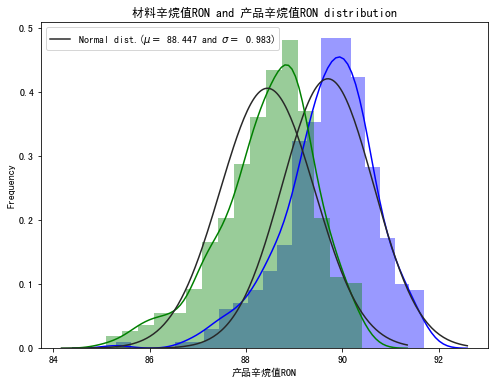

In [14]:
pair_distribute_plot(oline,['材料辛烷值RON','产品辛烷值RON'])

In [ ]:
oline['RON_LOSS_RATE'] = oline['RON_LOSS']/oline['材料辛烷值RON']

In [18]:
oline.columns[:20]

Index(['id', '时间', '材料硫含量', '材料辛烷值RON', '饱和烃', '烯烃', '芳烃', '溴值', '密度', '产品硫含量',
       '产品辛烷值RON', 'RON_LOSS', '待生焦炭', '待生S', '再生焦炭', '再生S', '氢油比', '反应过滤器压差',
       '还原器压力', '还原器流化氢气流量'],
      dtype='object')

变量饱和烃:$\mu$ = 52.676 and $\sigma$ = 4.577


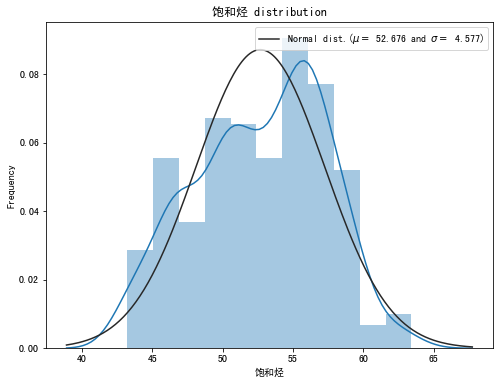

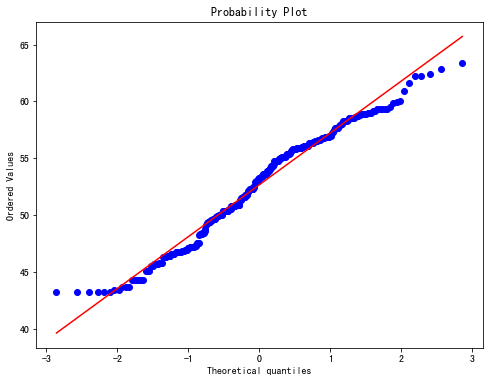

变量烯烃:$\mu$ = 25.389 and $\sigma$ = 4.947


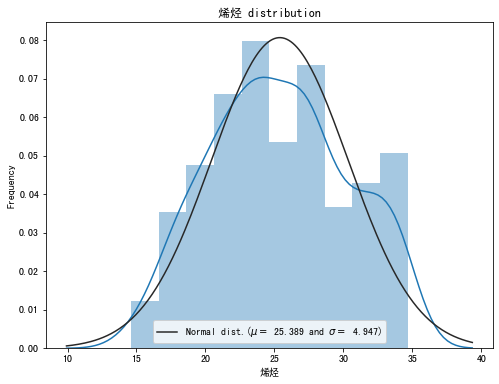

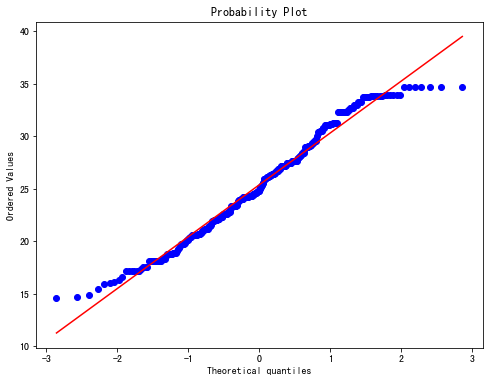

变量芳烃:$\mu$ = 21.932 and $\sigma$ = 1.850


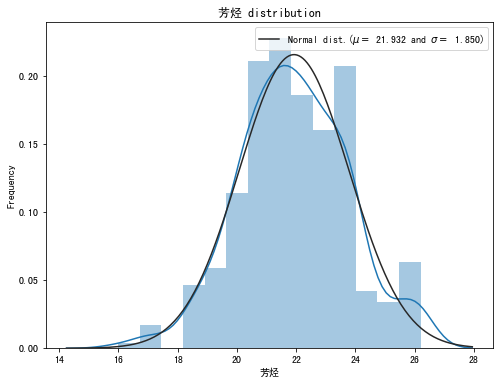

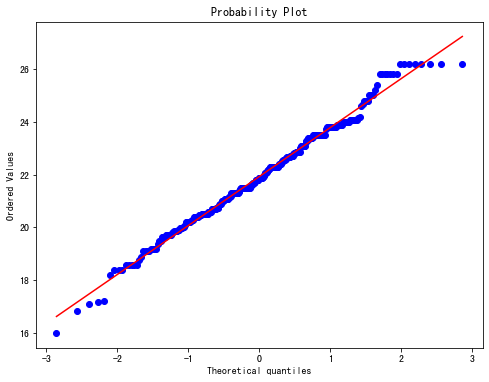

[('饱和烃', 52.676228083028086, 4.577255664877478),
 ('烯烃', 25.389297680097684, 4.947228608979246),
 ('芳烃', 21.931658852258852, 1.8503853089122924)]

In [25]:
distribute_plot(oline,['饱和烃','烯烃','芳烃'])

()

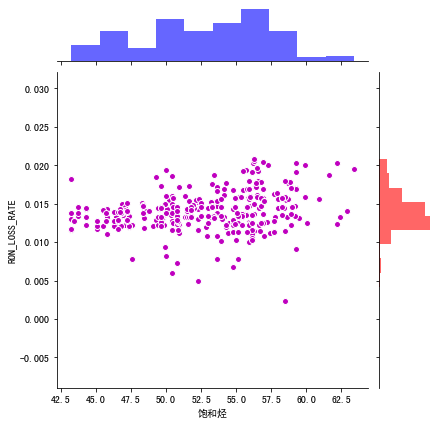

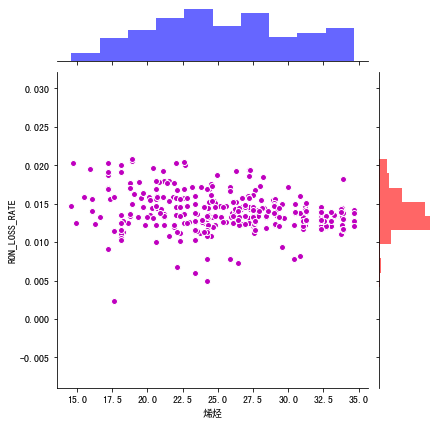

In [26]:
create_sca_join(oline, x='饱和烃', y = 'RON_LOSS_RATE')
create_sca_join(oline, x='烯烃', y = 'RON_LOSS_RATE')

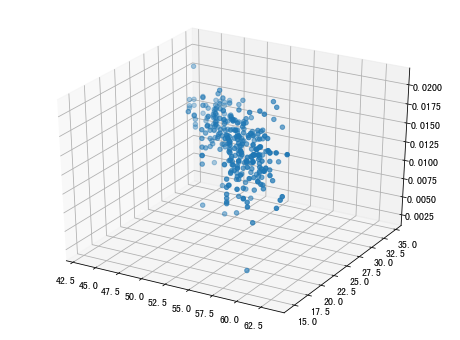

In [28]:
plot_scatter3D(oline['饱和烃'],oline['烯烃'],oline['RON_LOSS_RATE'])

()

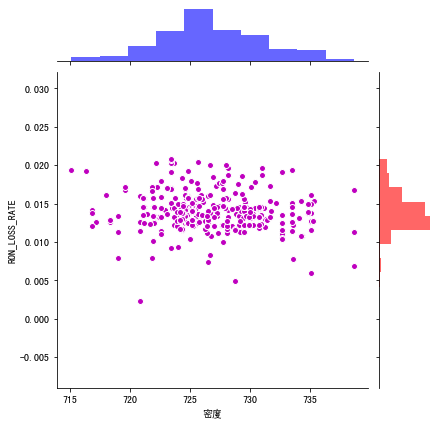

In [21]:
create_sca_join(oline, x='溴值', y='RON_LOSS_RATE')
create_sca_join(oline, x='密度', y='RON_LOSS_RATE')

In [23]:
def plot_scatter3D(x,y,z):
    fig = plt.figure(figsize=(8,6))
    axes = plt.axes(projection='3d')
    axes.scatter3D(x,y,z)
    plt.show()

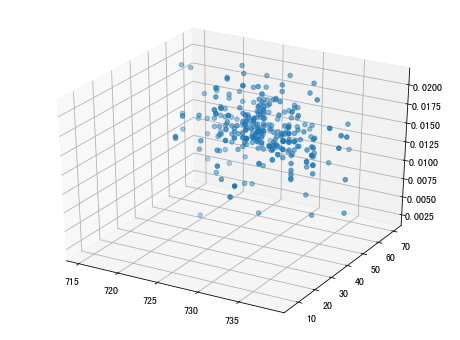

In [24]:
plot_scatter3D(oline['密度'],oline['溴值'],oline['RON_LOSS_RATE'])

In [19]:
# 散点图+边缘分布图
def create_sca_join(df, x='', y=''):
    fig = sns.JointGrid(x=x, y=y, data=df)
    fig.plot_joint(plt.scatter, color='m', edgecolor='white')  # 设置框内图表scatter
    fig.ax_marg_x.hist(df[x], color="b", alpha=0.6)
    fig.ax_marg_y.hist(df[y], color='r', alpha=0.6, orientation="horizontal")
    return ()

In [ ]:
# 自定义创建箱型图的函数
def create_box(df, x_name='', y_name='', title='', hue='', order_=[], scatter_=True):
    sns.boxplot(x=x_name, y=y_name, data=df,
                hue=hue,
                linewidth=2,  # 线宽
                width=0.8,  # 箱子之间的间隔比例
                fliersize=3,  # 异常点大小
                palette='hls',  # 设置调色板
                whis=1.5,  # 设置IQR
                notch=False,  # 设置是否以中值做凹槽
                order=order_)  # 筛选类别
    if scatter_:
        sns.swarmplot(x=x_name, y=y_name, data=df, color='k', size=3, alpha=0.6)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()
    return


In [ ]:
# 变量间相关性分析
def corr_plot(df, columns=[]):
    data_cor = df[columns]
    corrmat = data_cor.corr()
    # 设置下三角样式
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # 创建调试盘
    cmap = sns.diverging_palette(0.5, 10, as_cmap=True)
    # 绘制热力图
    # plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, mask=mask, cmap=cmap, annot=True, linewidths=0.2,
                center=100, vmax=1, vmin=0, square=True)
    return

In [14]:
distribute_plot(oline,['RON_LOSS_RATE'])

KeyError: 'RON_LOSS_RATE'

<Figure size 576x432 with 0 Axes>

In [22]:
oline.columns[:20]

Index(['id', '时间', '材料硫含量', '材料辛烷值RON', '饱和烃', '烯烃', '芳烃', '溴值', '密度', '产品硫含量',
       '产品辛烷值RON', 'RON_LOSS', '待生焦炭', '待生S', '再生焦炭', '再生S', '氢油比', '反应过滤器压差',
       '还原器压力', '还原器流化氢气流量'],
      dtype='object')

变量RON_LOSS:$\mu$ = 1.255 and $\sigma$ = 0.226


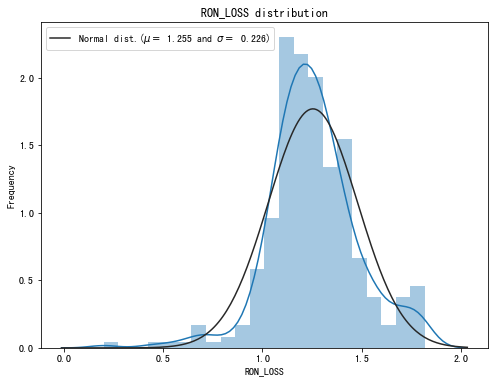

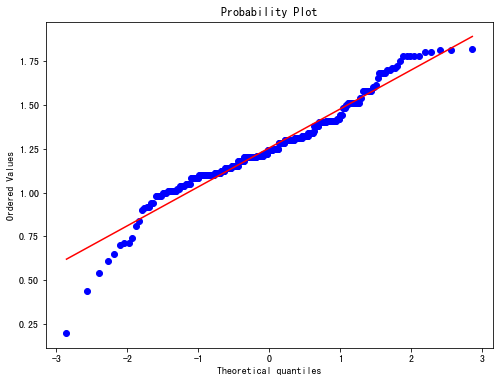

变量产品辛烷值RON:$\mu$ = 88.447 and $\sigma$ = 0.983


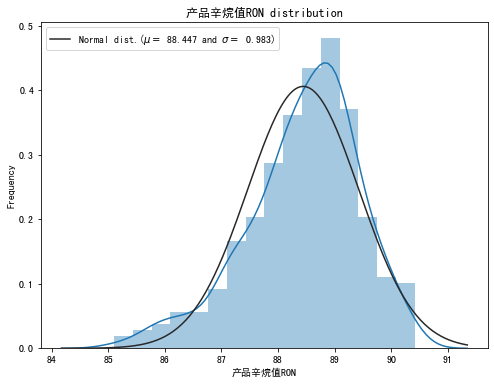

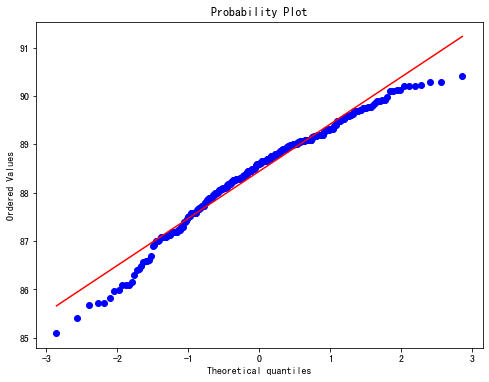

变量材料硫含量:$\mu$ = 229.549 and $\sigma$ = 65.651


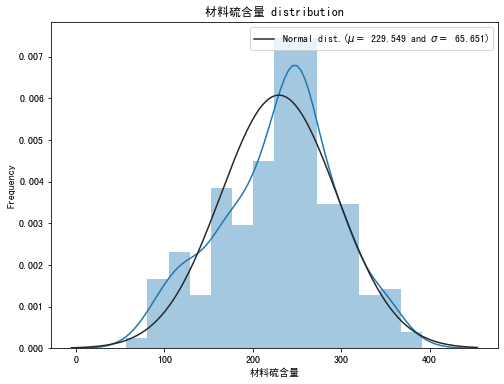

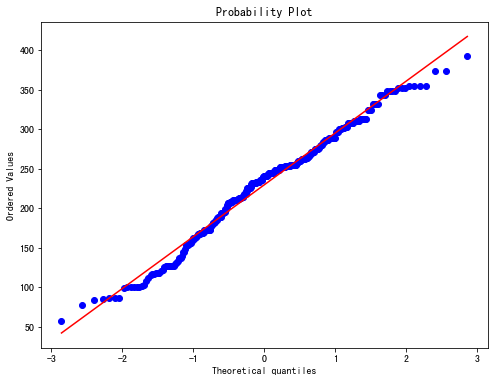

变量材料辛烷值RON:$\mu$ = 89.702 and $\sigma$ = 0.949


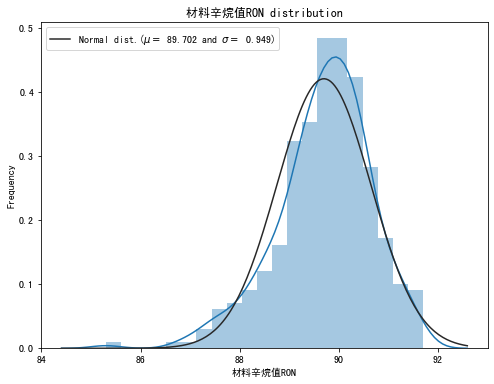

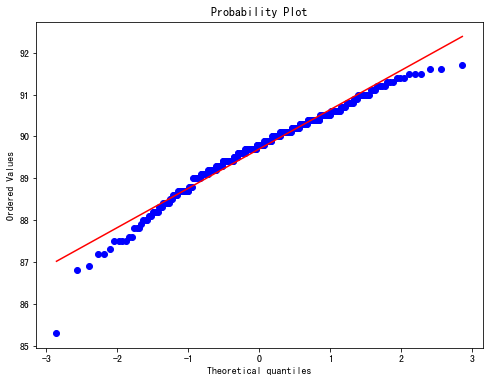

变量产品硫含量:$\mu$ = 4.058 and $\sigma$ = 1.549


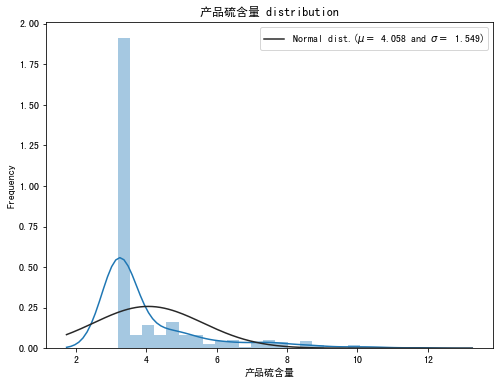

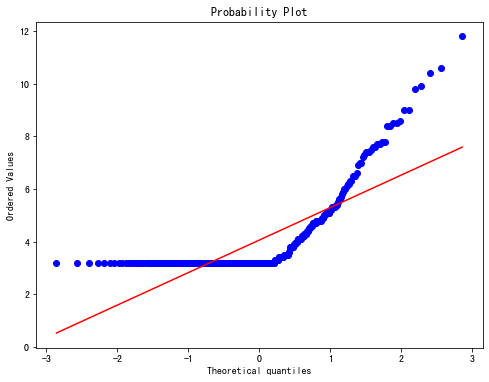

[('RON_LOSS', 1.2547692307692302, 0.22554213450676974),
 ('产品辛烷值RON', 88.44676923076922, 0.9832231262416133),
 ('材料硫含量', 229.54890431107353, 65.65099178037674),
 ('材料辛烷值RON', 89.70153846153846, 0.948600962988257),
 ('产品硫含量', 4.0581538461538464, 1.5487870115353473)]

In [15]:
distribute_plot(oline,['RON_LOSS','产品辛烷值RON','材料硫含量','材料辛烷值RON','产品硫含量'])

变量RON_LOSS:$\mu$ = 1.255 and $\sigma$ = 0.226


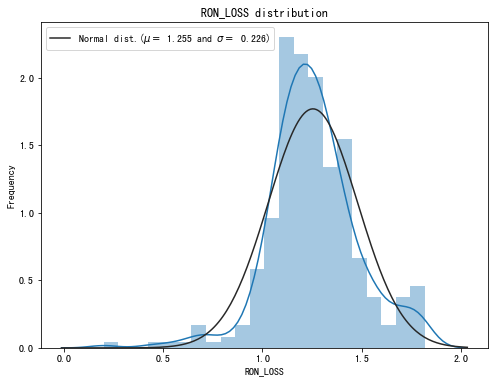

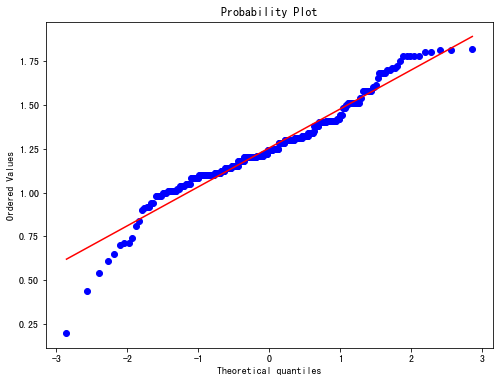

变量产品辛烷值RON:$\mu$ = 88.447 and $\sigma$ = 0.983


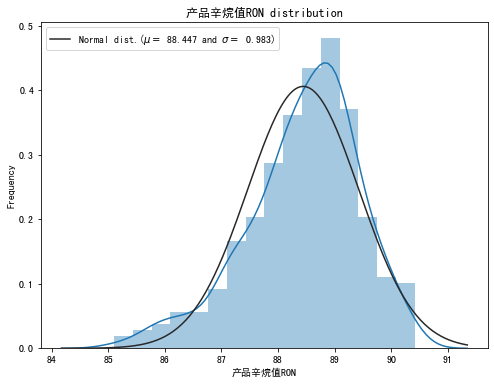

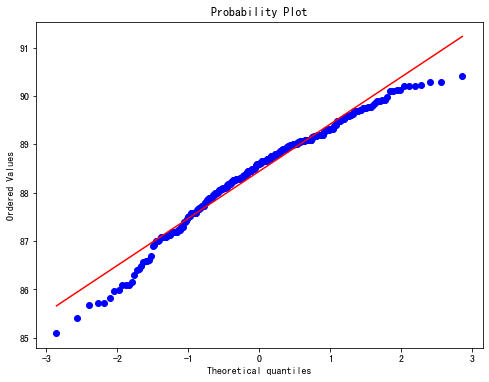

[('RON_LOSS', 1.2547692307692302, 0.22554213450676974),
 ('产品辛烷值RON', 88.44676923076922, 0.9832231262416133)]

In [16]:
distribute_plot(oline,['RON_LOSS','产品辛烷值RON'])

变量D-110底压力:$\mu$ = 17892.669 and $\sigma$ = 20126.659


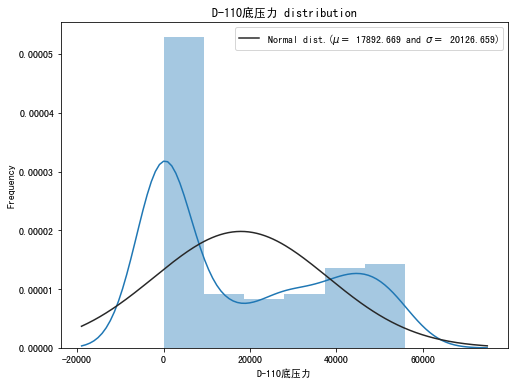

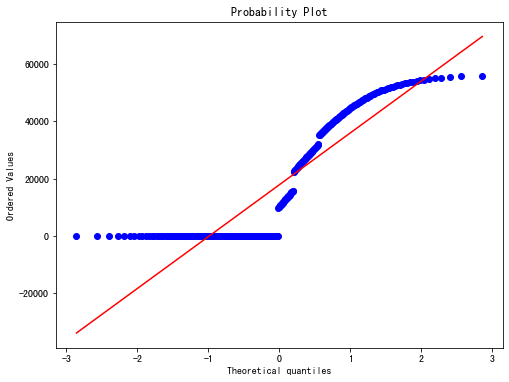

变量D-110底流化N2流量:$\mu$ = 34.979 and $\sigma$ = 6.620


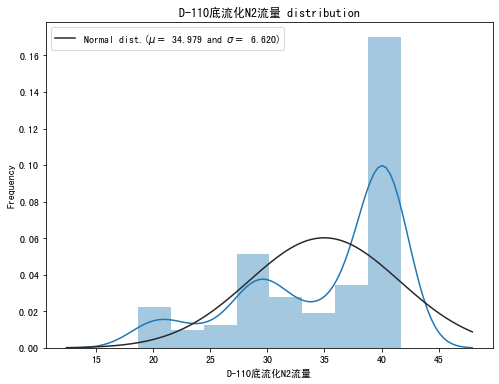

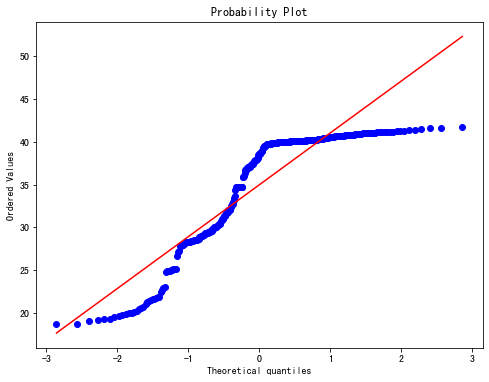

变量D-110底部:$\mu$ = 250.818 and $\sigma$ = 31.709


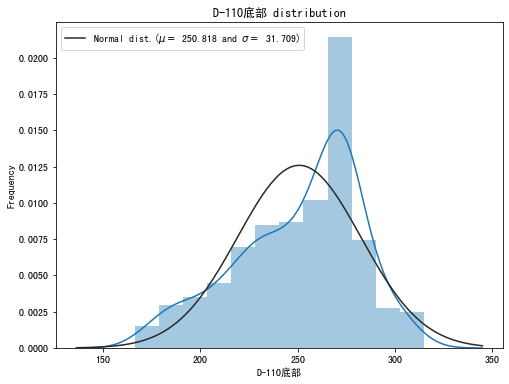

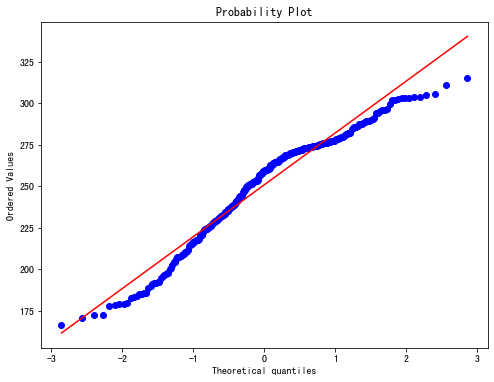

变量D-109压力:$\mu$ = 0.107 and $\sigma$ = 0.002


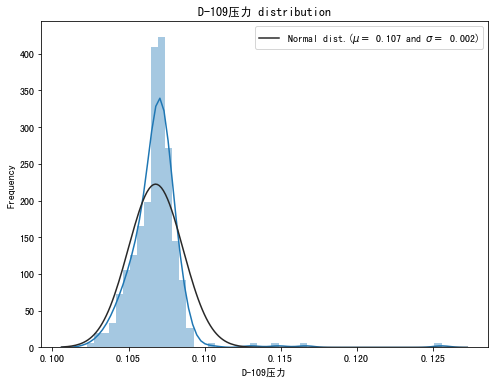

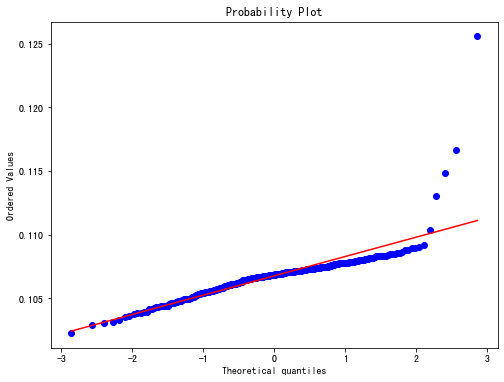

变量D-109吸附剂料位:$\mu$ = 22.455 and $\sigma$ = 17.603


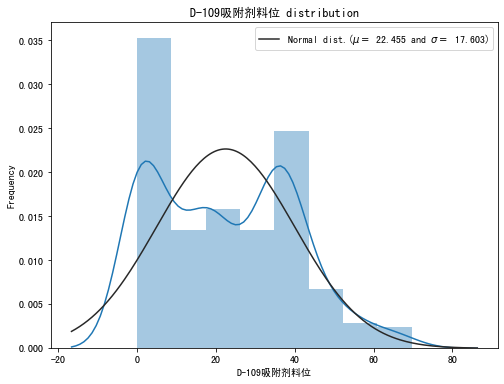

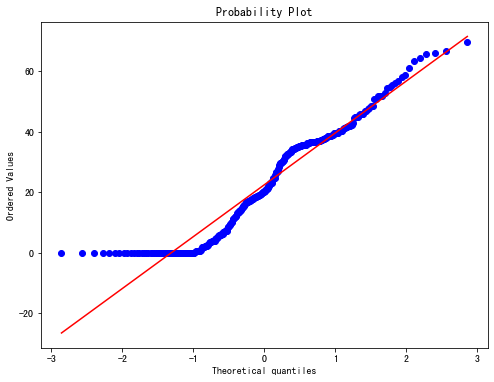

变量D-109松动风流量:$\mu$ = 15.765 and $\sigma$ = 13.467


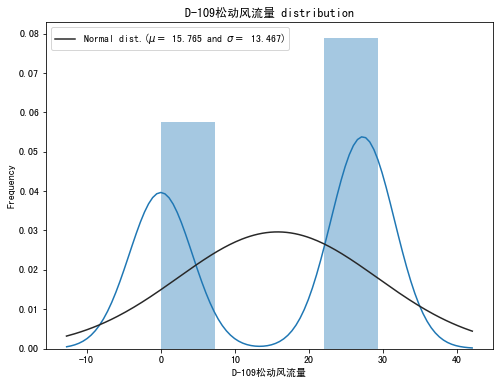

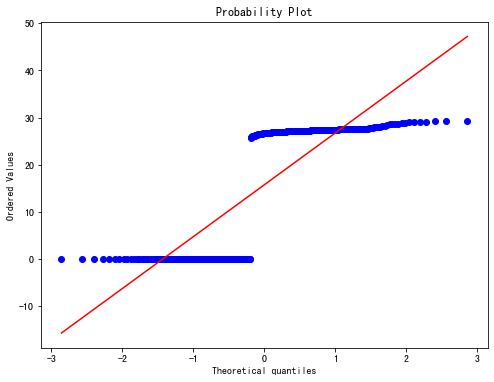

变量D-109上部温度:$\mu$ = 24.373 and $\sigma$ = 9.129


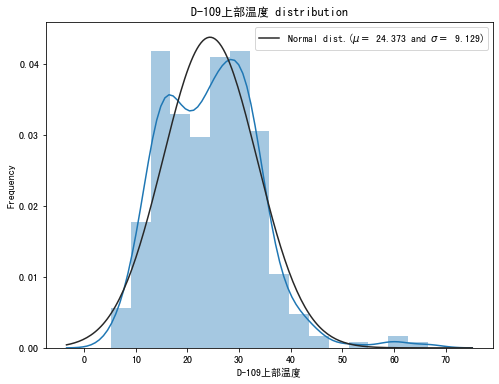

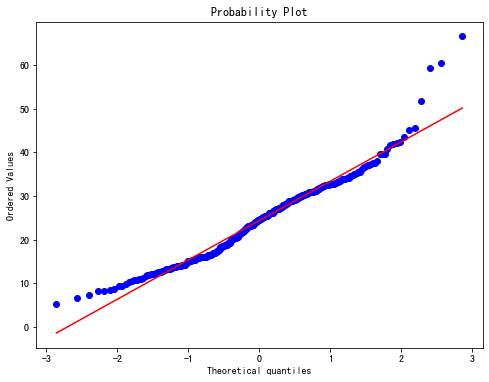

变量D-109底部:$\mu$ = 24.067 and $\sigma$ = 8.739


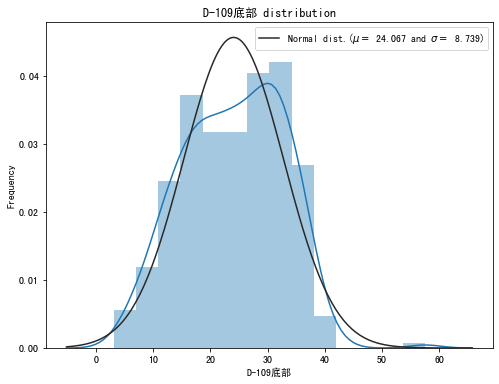

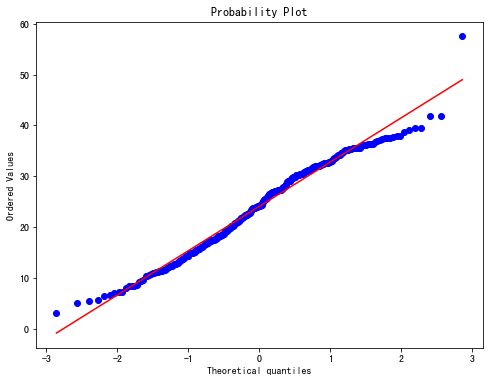

变量D-107下部松动风流量:$\mu$ = 14.083 and $\sigma$ = 6.806


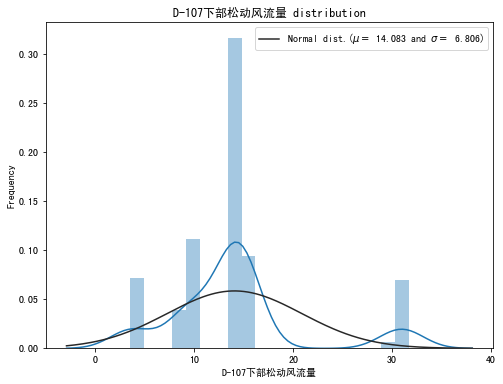

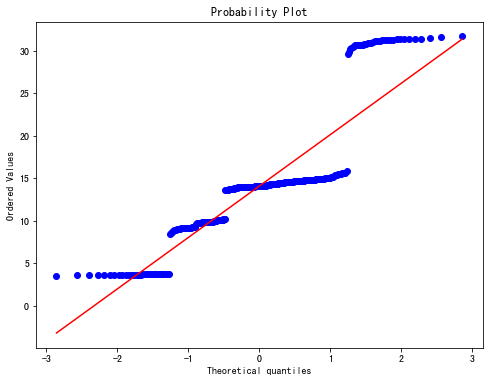

变量D-107温度:$\mu$ = 204.805 and $\sigma$ = 17.050


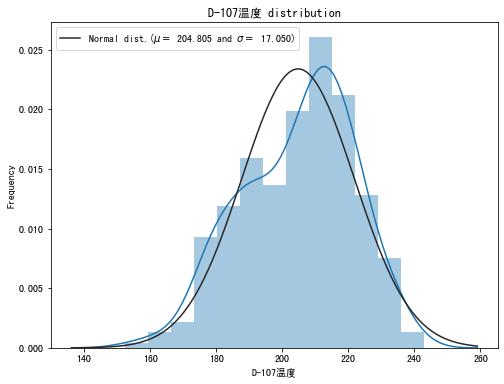

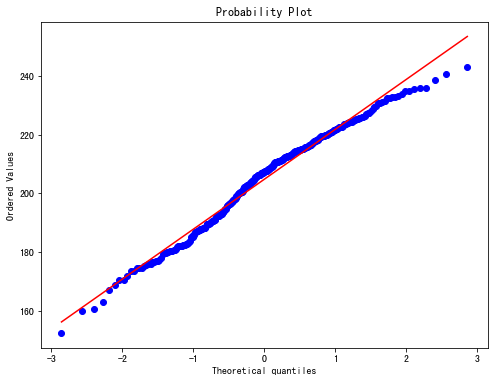

[('D-110底压力', 17892.66908023724, 20126.659324620956),
 ('D-110底流化N2流量', 34.97860507977458, 6.619521335899924),
 ('D-110底部', 250.81800254316704, 31.70852716384104),
 ('D-109压力', 0.10678094680392505, 0.0017940917606585676),
 ('D-109吸附剂料位', 22.455247354352334, 17.603114438053865),
 ('D-109松动风流量', 15.765005393369908, 13.466567396415297),
 ('D-109上部温度', 24.37298837011806, 9.129474007525642),
 ('D-109底部', 24.066531787142576, 8.738784397521208),
 ('D-107下部松动风流量', 14.082711501421809, 6.806243967824676),
 ('D-107温度', 204.80479189343473, 17.050441656856506)]

In [22]:
distribute_plot(oline,oline.columns[161:171])

In [38]:
oline[oline.columns[16:]].corr().to_csv('./corr.csv')